****
# Generation of Test Data
****

In this notebook we generate some test data for the interactive histogram. We create both unbinned energy values and binned efficiency curves.

In [8]:
import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.figure_formats = ['svg']

# Energy Data

We generate the data randomly sampled from some standard distributions for three exemplary experiments.

In [2]:
exp_A = np.concatenate((np.random.exponential(scale=1, size=100000), 
                        np.random.normal(loc=5,scale=0.2, size=100000)))
exp_B = np.concatenate((np.random.exponential(scale=0.5, size=50000), 
                        np.random.uniform(low=0,high=15, size=20000)))
exp_C = np.concatenate((np.random.exponential(scale=2, size=150000), 
                        np.random.normal(loc=10,scale=2, size=150000)))

Lets see how the data looks like.

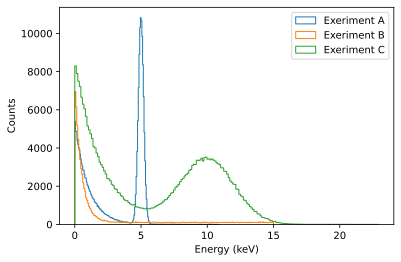

In [10]:
bins = 200

plt.hist(exp_A, bins=200, histtype='step', label='Exeriment A')
plt.hist(exp_B, bins=200, histtype='step', label='Exeriment B')
plt.hist(exp_C, bins=200, histtype='step', label='Exeriment C')
plt.ylabel('Counts')
plt.xlabel('Energy (keV)')
plt.legend()
plt.show()

We save the data in a simple txt format.

In [5]:
np.savetxt('experiment_A.txt', exp_A)
np.savetxt('experiment_B.txt', exp_B)
np.savetxt('experiment_C.txt', exp_C)

# Efficiency Data

We create the efficiency curves on an already binned grid.

In [25]:
grid = np.arange(0.002, 20, 0.002)

eff_A = (np.ones(grid.shape) - np.exp(-grid))*0.8 + 0.2
eff_B = 0.9*np.ones(grid.shape)
eff_C = (np.sqrt(grid) / np.sqrt(grid[-1]) * 0.7*np.ones(grid.shape))*0.8 + 0.2

Lets plot the curves.

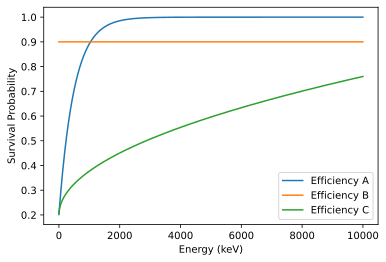

In [28]:
plt.plot(eff_A, label='Efficiency A')
plt.plot(eff_B, label='Efficiency B')
plt.plot(eff_C, label='Efficiency C')
plt.xlabel('Energy (keV)')
plt.ylabel('Survival Probability')
plt.legend()
plt.show()

Now lets plot the re-weighted histogram.

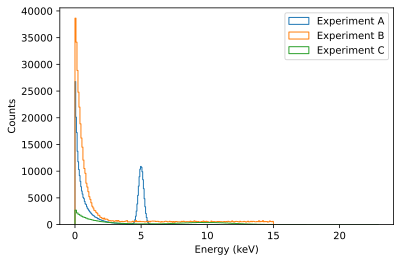

In [31]:
# put the exposures

exposure_A = 1
exposure_B = 0.2
exposure_C = 15

# make histograms

hist_A, bins_A = np.histogram(exp_A, bins)
hist_B, bins_B = np.histogram(exp_B, bins)
hist_C, bins_C = np.histogram(exp_C, bins)

# reweight with efficiencies

hist_A = hist_A / np.interp(bins_A[:-1], grid, eff_A)
hist_B = hist_B / np.interp(bins_B[:-1], grid, eff_B)
hist_C = hist_C / np.interp(bins_C[:-1], grid, eff_C)

# plot - comment the lines of experiments to not show them

plt.hist(bins_A[:-1], bins_A, weights=hist_A/exposure_A, histtype='step', label='Experiment A', color='C0')
plt.hist(bins_B[:-1], bins_B, weights=hist_B/exposure_B, histtype='step', label='Experiment B', color='C1')
plt.hist(bins_C[:-1], bins_C, weights=hist_C/exposure_C, histtype='step', label='Experiment C', color='C2')
plt.xlabel('Energy (keV)')
plt.ylabel('Counts')
plt.legend()
plt.show()

And save the efficiency curves to files as well.

In [34]:
np.savetxt('experiment_A_eff.txt', np.column_stack([grid, eff_A]))
np.savetxt('experiment_B_eff.txt', np.column_stack([grid, eff_B]))
np.savetxt('experiment_C_eff.txt', np.column_stack([grid, eff_C]))